# K Means Example

Minimal working example for a K Means Clustering using sklearn. The dataset is purposely kept small as it's only supposed to give a simple setup draft for a K Means Clustering.

## 1. load example Data

Loading the data. In this case we use a very small version of the iris dataset, to provide a minimal working example. 

In [1]:
import pandas as pd

df = pd.read_csv(".././Data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. prepare data

Spot for data preparation. As this example is quiet simple to have a basic refference we just drop the unsude ID.

In [2]:
df = df.drop("Id", axis = 1)

## 3. set parameters

Space to set different parameters to allow for easy adjustments and keep a clean structure.

In [20]:
test_size = 0.25
random_state = 0
n_clusters = 3

## 4. Split X and Y

In [4]:
X = df[ df.columns[df.columns!='Species']].values
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
Y = df[["Species"]].values

## 5. Standardscaler

Standadize values, so that the distance between them loweredby generalization which makes it easier for the model to work with.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
Y_transformed = scaler.transform(X)

## 6. train model

Train the model.

In [22]:
from sklearn.cluster import KMeans

model = KMeans(random_state=random_state, n_clusters =n_clusters)
model.fit(X_transformed, Y_transformed)


KMeans(n_clusters=3, random_state=0)

## 7. analyse model

Analyse the created model. Check clusters and use elbow method to see if number of clusters can be chosen better.

In [23]:
print(model.score(X_transformed, Y_transformed))

-140.965816630747


In [24]:
model.cluster_centers_

array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187]])

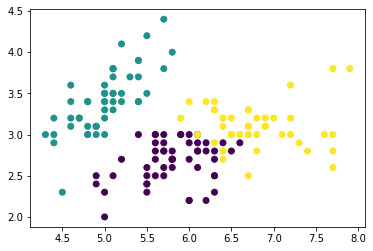

In [25]:
labels = model.labels_

%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c = labels)
plt.show()

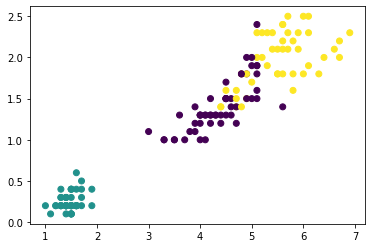

In [26]:
%matplotlib inline


plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"], c = labels)
plt.show()

In [7]:
scores = []
for n in range(2, 10):
    model = KMeans(n_clusters = n)
    model.fit(X_transformed)
    scores.append(model.inertia_)

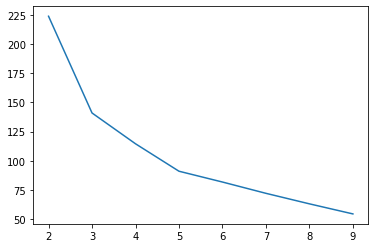

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(2, 10), scores)
plt.show()

Chose n where the strongest shift from a vertical to horizontal trend is noticeable.